# Toxic Comment Identifier
#### Manasvini Hothur, Udisha Madnani

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

### Preprocessing

In [5]:
import re

In [6]:
def preprocess_text(text, lower_case=True):
    
    if lower_case:
        text = text.lower()
    
    # Remove website links
    template = re.compile(r'https?://\S+|www\.\S+') 
    text = template.sub(r'', text)
    
    # Remove HTML tags
    template = re.compile(r'<[^>]*>') 
    text = template.sub(r'', text)
    
    # Remove none ascii characters
    template = re.compile(r'[^\x00-\x7E]+') 
    text = template.sub(r'', text)
    
    # Replace none printable characters
    template = re.compile(r'[\x00-\x0F]+') 
    text = template.sub(r' ', text)
    # Remove special characters
    text = re.sub("'s", '', text)
    template = re.compile('["#$%&\'()\*\+-/:;<=>@\[\]\\\\^_`{|}~]') 
    text = template.sub(r' ', text)
    # Replace multiple punctuation 
    text = re.sub('[.!?]{2,}', '.', text)
    text = re.sub(',+', ',', text) 
    # Remove numbers
    text = re.sub('\d+', ' ', text) 
        
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    
    # Remove spaces at the beginning and at the end of string
    text = text.strip() 

    return text

In [7]:
df["comment_text"] = df["comment_text"].map(lambda com : preprocess_text(com))

In [8]:
df.head(30)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww! he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
5,00025465d4725e87,congratulations from me as well use the tools ...,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [9]:
df['TOXIC'] = df.toxic	+ df.severe_toxic + 	df.obscene	+ df.threat + df.insult + 	df.identity_hate

In [10]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,TOXIC
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww! he matches this background colour i m s...,0,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it j...,0,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0
5,00025465d4725e87,congratulations from me as well use the tools ...,0,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0,4
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [11]:
def is_toxic(x):
  if x > 0:
    return 1
  else:
    return 0

df['IS_TOXIC'] = df['TOXIC'].apply(is_toxic)

In [12]:
df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,TOXIC,IS_TOXIC
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww! he matches this background colour i m s...,0,0,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it j...,0,0,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0,0
5,00025465d4725e87,congratulations from me as well use the tools ...,0,0,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0,4,1
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0,0,0
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0,0


In [13]:
df2 = pd.read_csv('test.csv')

In [14]:
df2.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [15]:
df3 = pd.read_csv('test_labels.csv')

In [16]:
df4 = df3[df3.toxic!=-1]

In [17]:
df5 = df2.merge(df4, on='id', how='inner')

In [18]:
df5.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [19]:
df5["comment_text"] = df5["comment_text"].map(lambda com : preprocess_text(com))

In [20]:
df5.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,thank you for understanding i think very highl...,0,0,0,0,0,0
1,000247e83dcc1211,dear god this site is horrible,0,0,0,0,0,0
2,0002f87b16116a7f,somebody will invariably try to add religion? ...,0,0,0,0,0,0
3,0003e1cccfd5a40a,it says it right there that it is a type the t...,0,0,0,0,0,0
4,00059ace3e3e9a53,before adding a new product to the list make s...,0,0,0,0,0,0


#### Removing stop words

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manasvini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
df5['TOXIC'] = df5.toxic	+ df5.severe_toxic + 	df5.obscene	+ df5.threat + df5.insult + 	df5.identity_hate

In [23]:
df5['IS_TOXIC'] = df5['TOXIC'].apply(is_toxic)

In [24]:
df5.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,TOXIC,IS_TOXIC
0,0001ea8717f6de06,thank you for understanding i think very highl...,0,0,0,0,0,0,0,0
1,000247e83dcc1211,dear god this site is horrible,0,0,0,0,0,0,0,0
2,0002f87b16116a7f,somebody will invariably try to add religion? ...,0,0,0,0,0,0,0,0
3,0003e1cccfd5a40a,it says it right there that it is a type the t...,0,0,0,0,0,0,0,0
4,00059ace3e3e9a53,before adding a new product to the list make s...,0,0,0,0,0,0,0,0
5,000663aff0fffc80,this other one from,0,0,0,0,0,0,0,0
6,000689dd34e20979,reason for banning throwing this article needs...,0,0,0,0,0,0,0,0
7,000844b52dee5f3f,blocked from editing wikipedia,0,0,0,0,0,0,0,0
8,00091c35fa9d0465,arabs are committing genocide in iraq but no p...,1,0,0,0,0,0,1,1
9,000968ce11f5ee34,please stop if you continue to vandalize wikip...,0,0,0,0,0,0,0,0


### Vectorization

In [25]:
X_train = df.comment_text

In [26]:
y_train = df.IS_TOXIC

In [27]:
X_test = df5.comment_text

In [28]:
y_test = df5.IS_TOXIC

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vect = CountVectorizer(stop_words = 'english', ngram_range = (1,2), max_features = 100).fit(X_train, y_train)

In [31]:
vect.vocabulary_

{'edits': 24,
 'new': 48,
 'remove': 64,
 'talk': 76,
 'page': 50,
 'talk page': 77,
 'thanks': 79,
 'utc': 89,
 'really': 62,
 'trying': 84,
 'edit': 20,
 'information': 36,
 'make': 46,
 'section': 69,
 'think': 82,
 'need': 47,
 'want': 91,
 'let': 38,
 'know': 37,
 'articles': 4,
 'wikipedia': 95,
 'good': 30,
 'article': 3,
 'use': 85,
 'work': 96,
 'vandalism': 90,
 'subject': 73,
 'image': 35,
 'used': 86,
 'using': 88,
 'pages': 51,
 'list': 42,
 'link': 40,
 'note': 49,
 'deleted': 17,
 'deletion': 18,
 'questions': 60,
 'ask': 5,
 'copyright': 16,
 'thank': 78,
 'source': 70,
 'content': 15,
 'add': 1,
 'tag': 75,
 'believe': 6,
 'free': 27,
 'wp': 98,
 'going': 29,
 'look': 45,
 'like': 39,
 'discussion': 19,
 'said': 67,
 'stop': 72,
 'point': 56,
 'better': 8,
 'read': 61,
 'editing': 21,
 'sure': 74,
 'wrong': 99,
 'question': 59,
 'hope': 34,
 'sources': 71,
 'history': 33,
 'case': 11,
 'block': 9,
 'thing': 80,
 'time': 83,
 'help': 31,
 'things': 81,
 'actually': 0,
 

In [32]:
X_train_vectorized = vect.transform(X_train)

In [33]:
X_test_vectorized = vect.transform(X_test)

### Decision Tree Classifier 

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [35]:
pipe = make_pipeline(DecisionTreeClassifier())
param_grid = {'decisiontreeclassifier__max_depth':[3,4,5,6]}
gscv = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

In [36]:
gscv.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [3, 4, 5, 6]},
             return_train_score=True)

In [37]:
print(gscv.best_params_)
print(gscv.best_score_)

{'decisiontreeclassifier__max_depth': 3}
0.9136497213827569


In [38]:
print(gscv.score(X_test_vectorized, y_test))

0.9116883928850542


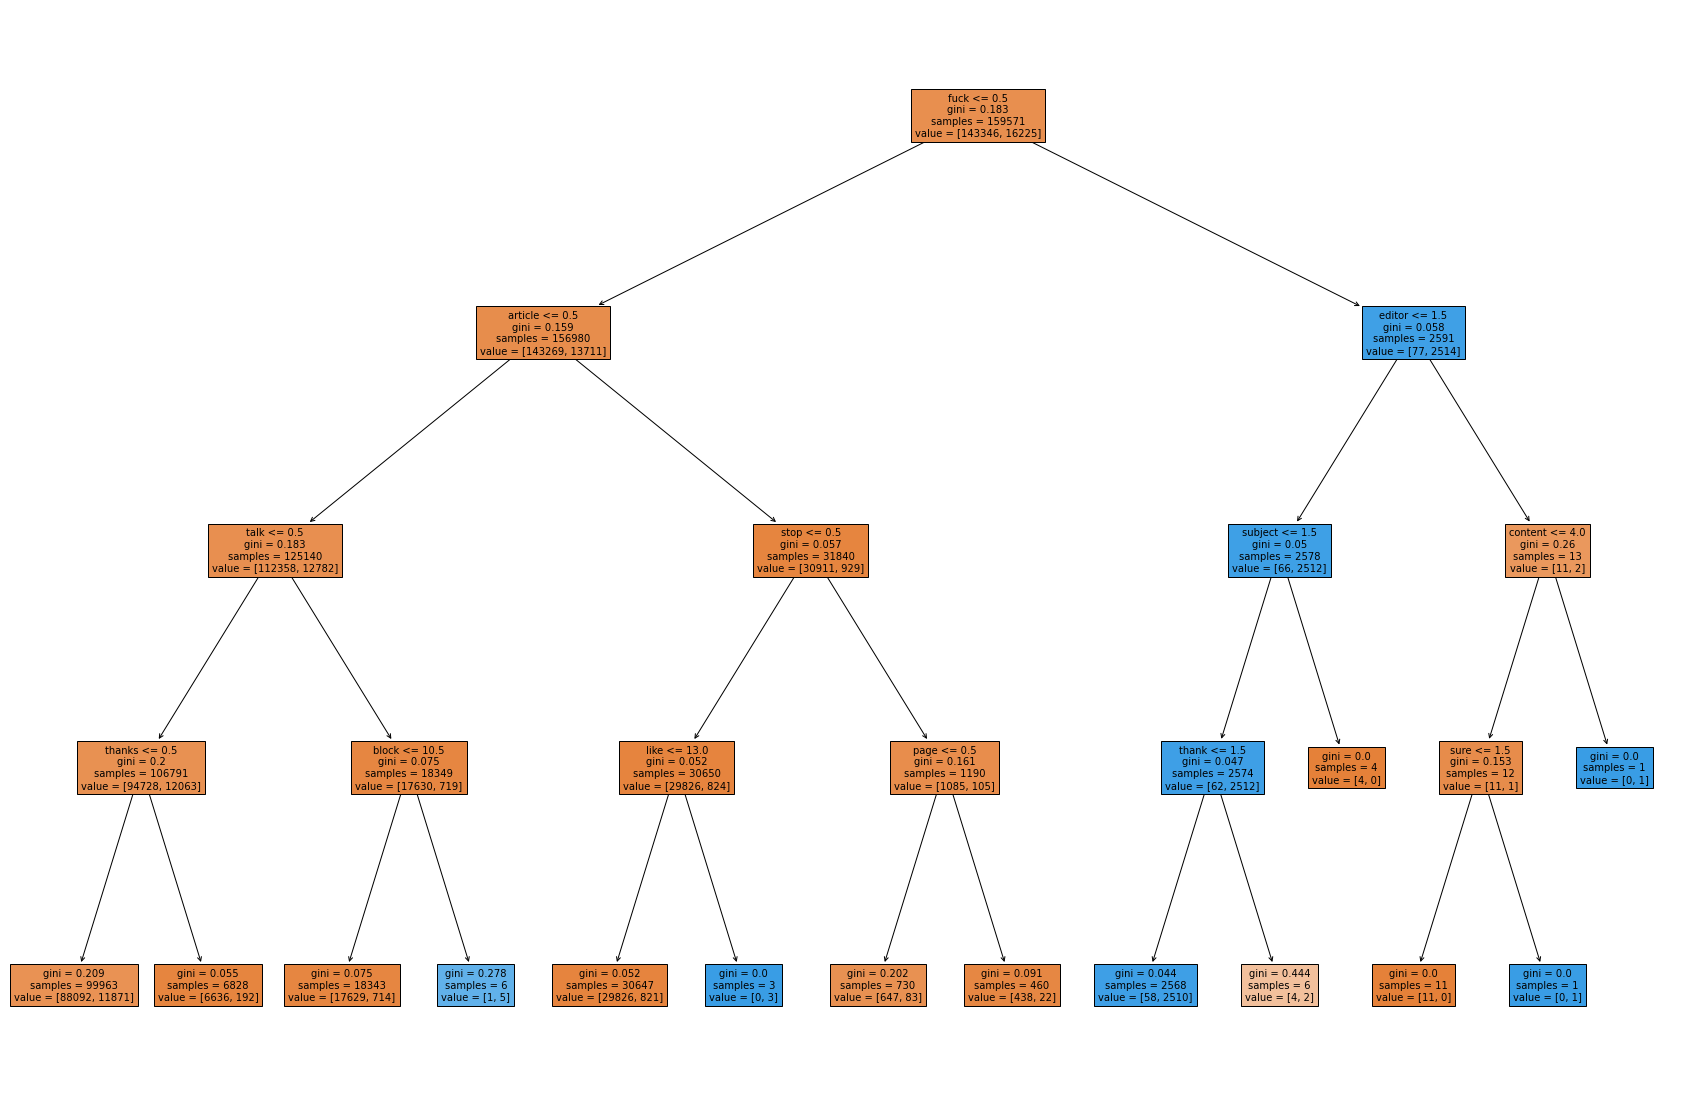

In [39]:
from sklearn import tree
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train_vectorized, y_train)
plt.figure(figsize = (30,20))
tree.plot_tree(dt, feature_names=vect.get_feature_names(), filled=True)
plt.show()

### MLP Classifier

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(6,))
mlp.fit(X_train_vectorized, y_train)
mlp.score(X_test_vectorized, y_test)

0.9114226765450624

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score

In [43]:
predictions = mlp.predict(X_test_vectorized)

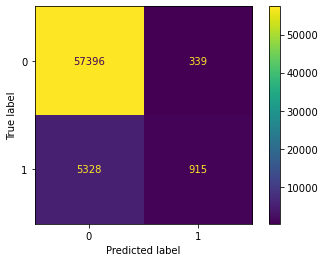

In [44]:
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

In [45]:
print('Recall score: ' + str(recall_score(y_test, predictions)))

Recall score: 0.14656415185007207
